# Etape 1 - Preparation et Nettoyage des Donnees

Objectif: Preparer un dataset propre et fusionne a partir de plusieurs sources de donnees pour l'entrainement du modele de scoring credit.

## 1. Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Configuration d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Definition des chemins
ROOT_DIR = Path('.').resolve().parent
DATA_DIR = ROOT_DIR / 'datasets'
OUTPUT_DIR = ROOT_DIR / 'outputs'

print(f"Root directory: {ROOT_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"Output directory: {OUTPUT_DIR}")

Root directory: C:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\MLOps
Data directory: C:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\MLOps\datasets
Output directory: C:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\MLOps\outputs


## 2. Charger les donnees

In [23]:
print("Chargement des donnees...")

application_train = pd.read_csv(DATA_DIR / 'application_train.csv')
application_test = pd.read_csv(DATA_DIR / 'application_test.csv')
bureau = pd.read_csv(DATA_DIR / 'bureau.csv')
bureau_balance = pd.read_csv(DATA_DIR / 'bureau_balance.csv')
credit_card_balance = pd.read_csv(DATA_DIR / 'credit_card_balance.csv')
installments_payments = pd.read_csv(DATA_DIR / 'installments_payments.csv')
pos_cash_balance = pd.read_csv(DATA_DIR / 'POS_CASH_balance.csv')
previous_application = pd.read_csv(DATA_DIR / 'previous_application.csv')

print(f"Application train shape: {application_train.shape}")
print(f"Application test shape: {application_test.shape}")
print(f"Bureau shape: {bureau.shape}")
print(f"Bureau balance shape: {bureau_balance.shape}")
print(f"Credit card balance shape: {credit_card_balance.shape}")
print(f"Installments payments shape: {installments_payments.shape}")
print(f"POS cash balance shape: {pos_cash_balance.shape}")
print(f"Previous application shape: {previous_application.shape}")

Chargement des donnees...
Application train shape: (307511, 122)
Application test shape: (48744, 121)
Bureau shape: (1716428, 17)
Bureau balance shape: (27299925, 3)
Credit card balance shape: (3840312, 23)
Installments payments shape: (13605401, 8)
POS cash balance shape: (10001358, 8)
Previous application shape: (1670214, 37)


## 3. Exploration de la data principale

In [3]:
print("=== APPLICATION TRAIN ===")
print(f"Colonnes: {application_train.shape[1]}")
print(f"Lignes: {application_train.shape[0]}")
application_train.head()

=== APPLICATION TRAIN ===
Colonnes: 122
Lignes: 307511


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
print("\nInfo sur les donnees:")
application_train.info()


Info sur les donnees:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
print("\n=== VARIABLE CIBLE ===")
print(application_train['TARGET'].value_counts())
print(f"\nPourcentage:")
print(application_train['TARGET'].value_counts(normalize=True) * 100)


=== VARIABLE CIBLE ===
TARGET
0    282686
1     24825
Name: count, dtype: int64

Pourcentage:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [6]:
# Statistiques descriptives
print("\n=== STATISTIQUES DESCRIPTIVES ===")
print("\n--- Statistiques numériques ---")
print(application_train.describe())

print("\n--- Statistiques par type ---")
print(f"Colonnes numériques: {len(application_train.select_dtypes(include=[np.number]).columns)}")
print(f"Colonnes catégories: {len(application_train.select_dtypes(include=['object']).columns)}")

# Doublons
print(f"\nDoublons: {application_train.duplicated().sum()}")

# Target distribution
print("\n=== DISTRIBUTION DE LA CIBLE ===")
target_dist = application_train['TARGET'].value_counts()
target_pct = application_train['TARGET'].value_counts(normalize=True) * 100
print(f"Classe 0 (Bon client): {target_dist[0]} ({target_pct[0]:.2f}%)")
print(f"Classe 1 (Mauvais client): {target_dist[1]} ({target_pct[1]:.2f}%)")
print(f"Déséquilibre: 1 mauvais pour {target_dist[0]/target_dist[1]:.1f} bons clients")


=== STATISTIQUES DESCRIPTIVES ===

--- Statistiques numériques ---
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2

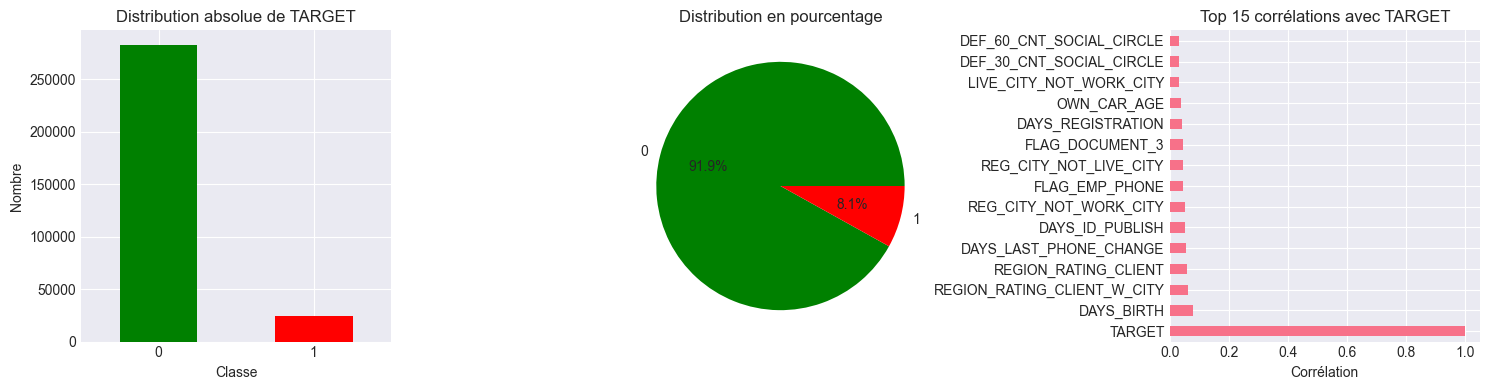


=== CORRÉLATIONS AVEC TARGET ===
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


In [7]:
# Visualiser la distribution de TARGET
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Bar chart
application_train['TARGET'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribution absolue de TARGET')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Nombre')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Pie chart
application_train['TARGET'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Distribution en pourcentage')
axes[1].set_ylabel('')

# Corrélation des variables numériques avec TARGET
numeric_corr = application_train.select_dtypes(include=[np.number]).corr()['TARGET'].sort_values(ascending=False)
numeric_corr.head(15).plot(kind='barh', ax=axes[2])
axes[2].set_title('Top 15 corrélations avec TARGET')
axes[2].set_xlabel('Corrélation')

plt.tight_layout()
plt.show()

print(f"\n=== CORRÉLATIONS AVEC TARGET ===")
print(numeric_corr.head(10))

## 3.1 - Analyse Descriptive et Visualisations

## 4. Analyser les valeurs manquantes

In [8]:
# Nombre de valeurs manquantes
missing_train = pd.DataFrame({
    'Column': application_train.columns,
    'Missing_Count': application_train.isnull().sum(),
    'Missing_Percentage': (application_train.isnull().sum() / len(application_train)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("=== VALEURS MANQUANTES ===")
print(missing_train[missing_train['Missing_Count'] > 0])

=== VALEURS MANQUANTES ===
                                                    Column  Missing_Count  \
COMMONAREA_AVG                              COMMONAREA_AVG         214865   
COMMONAREA_MODE                            COMMONAREA_MODE         214865   
COMMONAREA_MEDI                            COMMONAREA_MEDI         214865   
NONLIVINGAPARTMENTS_MEDI          NONLIVINGAPARTMENTS_MEDI         213514   
NONLIVINGAPARTMENTS_MODE          NONLIVINGAPARTMENTS_MODE         213514   
NONLIVINGAPARTMENTS_AVG            NONLIVINGAPARTMENTS_AVG         213514   
FONDKAPREMONT_MODE                      FONDKAPREMONT_MODE         210295   
LIVINGAPARTMENTS_AVG                  LIVINGAPARTMENTS_AVG         210199   
LIVINGAPARTMENTS_MEDI                LIVINGAPARTMENTS_MEDI         210199   
LIVINGAPARTMENTS_MODE                LIVINGAPARTMENTS_MODE         210199   
FLOORSMIN_MODE                              FLOORSMIN_MODE         208642   
FLOORSMIN_AVG                                FLOO


=== VISUALISATION DES VALEURS MANQUANTES ===


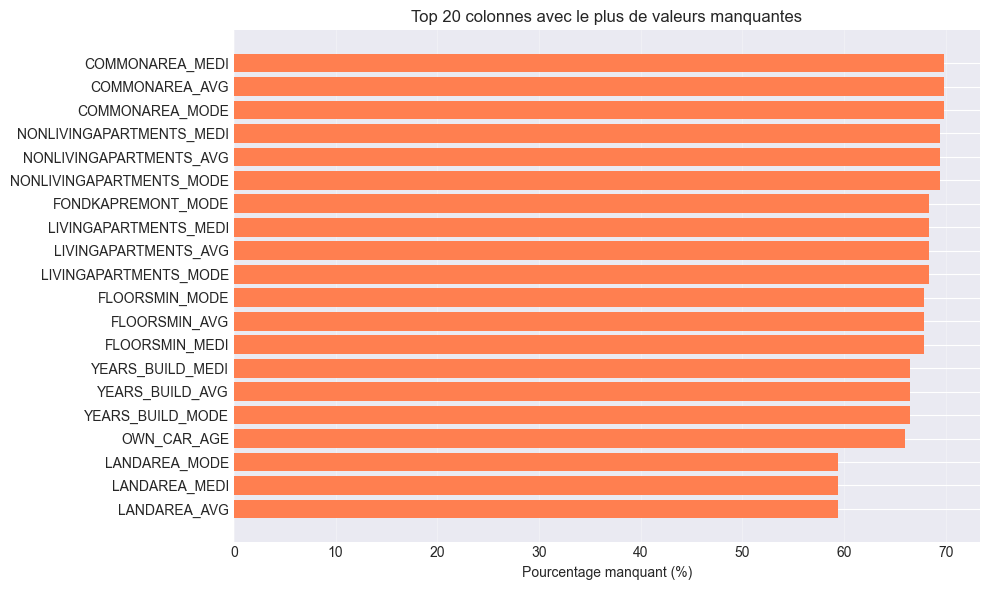


Colonnes avec > 50% manquantes: 41
                                            Column  Missing_Percentage
COMMONAREA_AVG                      COMMONAREA_AVG           69.872297
COMMONAREA_MODE                    COMMONAREA_MODE           69.872297
COMMONAREA_MEDI                    COMMONAREA_MEDI           69.872297
NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MEDI           69.432963
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MODE           69.432963
NONLIVINGAPARTMENTS_AVG    NONLIVINGAPARTMENTS_AVG           69.432963
FONDKAPREMONT_MODE              FONDKAPREMONT_MODE           68.386172
LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_AVG           68.354953
LIVINGAPARTMENTS_MEDI        LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE        LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                      FLOORSMIN_MODE           67.848630
FLOORSMIN_AVG                        FLOORSMIN_AVG           67.848630
FLOORSMIN_MEDI                      FLOOR

In [9]:
# Visualiser les valeurs manquantes
print("\n=== VISUALISATION DES VALEURS MANQUANTES ===")

# Colonnes avec valeurs manquantes (triées)
missing_cols = missing_train[missing_train['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=True).tail(20)

if len(missing_cols) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(missing_cols['Column'], missing_cols['Missing_Percentage'], color='coral')
    ax.set_xlabel('Pourcentage manquant (%)')
    ax.set_title('Top 20 colonnes avec le plus de valeurs manquantes')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyse par pourcentage
missing_high = missing_train[missing_train['Missing_Percentage'] > 50]
print(f"\nColonnes avec > 50% manquantes: {len(missing_high)}")
if len(missing_high) > 0:
    print(missing_high[['Column', 'Missing_Percentage']])

## 5. Fusionner les donnees

In [10]:
print("=== FEATURE ENGINEERING ===\n")

# 1. Créer des features temporelles
print("1. Features temporelles...")
application_train['AGE'] = -application_train['DAYS_BIRTH'] / 365.25
application_train['EMPLOYMENT_DAYS'] = -application_train['DAYS_EMPLOYED'] / 365.25

application_test['AGE'] = -application_test['DAYS_BIRTH'] / 365.25
application_test['EMPLOYMENT_DAYS'] = -application_test['DAYS_EMPLOYED'] / 365.25

# 2. Features de relation revenus/crédit
print("2. Features de ratio revenus/crédit...")
application_train['INCOME_CREDIT_RATIO'] = application_train['AMT_INCOME_TOTAL'] / (application_train['AMT_CREDIT'] + 1)
application_train['INCOME_ANNUITY_RATIO'] = application_train['AMT_INCOME_TOTAL'] / (application_train['AMT_ANNUITY'] + 1)
application_train['CREDIT_ANNUITY_RATIO'] = application_train['AMT_CREDIT'] / (application_train['AMT_ANNUITY'] + 1)
application_train['INCOME_PER_FAMILY'] = application_train['AMT_INCOME_TOTAL'] / (application_train['CNT_FAM_MEMBERS'] + 1)

application_test['INCOME_CREDIT_RATIO'] = application_test['AMT_INCOME_TOTAL'] / (application_test['AMT_CREDIT'] + 1)
application_test['INCOME_ANNUITY_RATIO'] = application_test['AMT_INCOME_TOTAL'] / (application_test['AMT_ANNUITY'] + 1)
application_test['CREDIT_ANNUITY_RATIO'] = application_test['AMT_CREDIT'] / (application_test['AMT_ANNUITY'] + 1)
application_test['INCOME_PER_FAMILY'] = application_test['AMT_INCOME_TOTAL'] / (application_test['CNT_FAM_MEMBERS'] + 1)

# 3. Features de stabilité d'emploi
print("3. Features de stabilité d'emploi...")
application_train['EMPLOYED_RATIO'] = application_train['EMPLOYMENT_DAYS'] / (application_train['AGE'] + 1)
application_test['EMPLOYED_RATIO'] = application_test['EMPLOYMENT_DAYS'] / (application_test['AGE'] + 1)

# 4. Features de documents
print("4. Features de documents...")
doc_cols = [col for col in application_train.columns if col.startswith('FLAG_DOCUMENT')]
application_train['DOCUMENTS_COUNT'] = application_train[doc_cols].sum(axis=1)
application_test['DOCUMENTS_COUNT'] = application_test[doc_cols].sum(axis=1)

# 5. Features de contact
print("5. Features de contact...")
contact_cols = [col for col in application_train.columns if col.startswith('FLAG_PHONE') or col.startswith('FLAG_EMAIL')]
application_train['CONTACT_COUNT'] = application_train[contact_cols].sum(axis=1)
application_test['CONTACT_COUNT'] = application_test[contact_cols].sum(axis=1)

# 6. Features catégories binaires
print("6. Traitement variables catégories...")
# Organisation type
application_train['ORG_TYPE_SIMPLE'] = application_train['ORGANIZATION_TYPE'].apply(lambda x: 1 if x in ['Self-employed', 'Unemployed', 'Pensioner'] else 0)
application_test['ORG_TYPE_SIMPLE'] = application_test['ORGANIZATION_TYPE'].apply(lambda x: 1 if x in ['Self-employed', 'Unemployed', 'Pensioner'] else 0)

print(f"\n✓ Features engineering complètement: {len([c for c in application_train.columns if c not in application_train.columns[:122]])} nouvelles colonnes créées")
print(f"Application train shape: {application_train.shape}")
print(f"Application test shape: {application_test.shape}")

=== FEATURE ENGINEERING ===

1. Features temporelles...
2. Features de ratio revenus/crédit...
3. Features de stabilité d'emploi...
4. Features de documents...
5. Features de contact...
6. Traitement variables catégories...

✓ Features engineering complètement: 10 nouvelles colonnes créées
Application train shape: (307511, 132)
Application test shape: (48744, 131)


## 4.5 - Feature Engineering (avant fusion)

In [11]:
train = application_train.copy()
test = application_test.copy()

print("=== FUSION DES DONNEES ===")

# Bureau balance aggregation
print("\n1. Traitement Bureau Balance...")
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'STATUS': 'max'
}).reset_index()
bureau_balance_agg.columns = ['SK_ID_BUREAU', 'bb_min_months', 'bb_max_months', 'bb_mean_months', 'bb_worst_status']

bureau = bureau.merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')
print(f"Bureau shape apres fusion: {bureau.shape}")

=== FUSION DES DONNEES ===

1. Traitement Bureau Balance...
Bureau shape apres fusion: (1716428, 21)


In [12]:
# Bureau aggregation par client
print("2. Agregation Bureau par client...")

# Avant agregation: convertir STATUS en numerique pour le max()
# Créer une mapping pour les status (X=worst, 5=best)
status_mapping = {'X': 5, 'C': 4, '3': 3, '2': 2, '1': 1, '0': 0}
bureau['bb_worst_status_numeric'] = bureau['bb_worst_status'].map(status_mapping).fillna(0).astype(int)

bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'SK_ID_BUREAU': 'count',
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),
    'AMT_CREDIT_SUM': ['sum', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'],
    'DAYS_CREDIT': 'mean',
    'bb_worst_status_numeric': 'max'
}).reset_index()
bureau_agg.columns = ['SK_ID_CURR', 'bureau_count', 'bureau_active_count', 'bureau_credit_sum', 'bureau_credit_mean', 'bureau_debt_sum', 'bureau_debt_mean', 'bureau_days_credit_mean', 'bureau_worst_status']
print(f"Shape: {bureau_agg.shape}")

2. Agregation Bureau par client...
Shape: (305811, 9)


In [13]:
# Credit Card Balance - Verifier les colonnes d'abord
print("3. Agregation Credit Card Balance...")
print(f"Colonnes disponibles: {list(credit_card_balance.columns)}")

credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['sum', 'mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['sum', 'mean'],
    'MONTHS_BALANCE': 'count'
}).reset_index()
credit_card_agg.columns = ['SK_ID_CURR', 'credit_card_balance_sum', 'credit_card_balance_mean', 'credit_card_balance_max', 'credit_card_limit_sum', 'credit_card_limit_mean', 'credit_card_count']
print(f"Shape: {credit_card_agg.shape}")

3. Agregation Credit Card Balance...
Colonnes disponibles: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']
Shape: (103558, 7)


In [14]:
# Installments Payments
print("4. Agregation Installments Payments...")
installments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_NUMBER': 'count',
    'AMT_INSTALMENT': ['sum', 'mean'],
    'AMT_PAYMENT': ['sum', 'mean'],
    'DAYS_ENTRY_PAYMENT': 'mean'
}).reset_index()
installments_agg.columns = ['SK_ID_CURR', 'installments_count', 'installments_sum', 'installments_mean', 'payment_sum', 'payment_mean', 'payment_days_mean']
print(f"Shape: {installments_agg.shape}")

4. Agregation Installments Payments...
Shape: (339587, 7)


In [15]:
# POS Cash Balance
print("5. Agregation POS Cash Balance...")
pos_agg = pos_cash_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': 'count',
    'CNT_INSTALMENT': 'sum',
    'CNT_INSTALMENT_FUTURE': 'sum'
}).reset_index()
pos_agg.columns = ['SK_ID_CURR', 'pos_count', 'pos_installment_sum', 'pos_future_installment']
print(f"Shape: {pos_agg.shape}")

5. Agregation POS Cash Balance...
Shape: (337252, 4)


In [16]:
# Previous Application - Verifier les colonnes disponibles
print("6. Agregation Previous Application...")
print(f"Colonnes disponibles: {list(previous_application.columns)}")

previous_app_agg = previous_application.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean'
}).reset_index()
previous_app_agg.columns = ['SK_ID_CURR', 'previous_app_count', 'previous_app_amount_mean', 'previous_credit_mean']
print(f"Shape: {previous_app_agg.shape}")

6. Agregation Previous Application...
Colonnes disponibles: ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
Shape: (338857, 4)


In [17]:
# Fusionner toutes les aggregations
print("\n=== FUSION DES AGREGATIONS ===")
train = train.merge(bureau_agg, on='SK_ID_CURR', how='left')
print(f"Apres bureau_agg: {train.shape}")

train = train.merge(credit_card_agg, on='SK_ID_CURR', how='left')
print(f"Apres credit_card_agg: {train.shape}")

train = train.merge(installments_agg, on='SK_ID_CURR', how='left')
print(f"Apres installments_agg: {train.shape}")

train = train.merge(pos_agg, on='SK_ID_CURR', how='left')
print(f"Apres pos_agg: {train.shape}")

train = train.merge(previous_app_agg, on='SK_ID_CURR', how='left')
print(f"Apres previous_app_agg: {train.shape}")

print(f"\nFusion terminee! Shape final: {train.shape}")


=== FUSION DES AGREGATIONS ===
Apres bureau_agg: (307511, 140)
Apres credit_card_agg: (307511, 146)
Apres installments_agg: (307511, 152)
Apres pos_agg: (307511, 155)
Apres previous_app_agg: (307511, 158)

Fusion terminee! Shape final: (307511, 158)


## 6. Gerer les valeurs manquantes

In [18]:
# Verifier les valeurs manquantes apres fusion
missing_after = pd.DataFrame({
    'Column': train.columns,
    'Missing_Count': train.isnull().sum(),
    'Missing_Percentage': (train.isnull().sum() / len(train)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("=== VALEURS MANQUANTES APRES FUSION ===")
print(missing_after[missing_after['Missing_Count'] > 0])

=== VALEURS MANQUANTES APRES FUSION ===
                                                    Column  Missing_Count  \
credit_card_balance_max            credit_card_balance_max         220606   
credit_card_limit_sum                credit_card_limit_sum         220606   
credit_card_balance_sum            credit_card_balance_sum         220606   
credit_card_balance_mean          credit_card_balance_mean         220606   
credit_card_limit_mean              credit_card_limit_mean         220606   
credit_card_count                        credit_card_count         220606   
COMMONAREA_MODE                            COMMONAREA_MODE         214865   
COMMONAREA_AVG                              COMMONAREA_AVG         214865   
COMMONAREA_MEDI                            COMMONAREA_MEDI         214865   
NONLIVINGAPARTMENTS_MODE          NONLIVINGAPARTMENTS_MODE         213514   
NONLIVINGAPARTMENTS_AVG            NONLIVINGAPARTMENTS_AVG         213514   
NONLIVINGAPARTMENTS_MEDI          NO

## 7. Encoder les variables categoriques

## 8. Export des donnees

In [19]:
print("\n=== DONNEES FINALES ===")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"\nValeurs manquantes en train: {train.isnull().sum().sum()}")
print(f"Valeurs manquantes en test: {test.isnull().sum().sum()}")

# Export en format parquet
train.to_parquet(OUTPUT_DIR / "train_processed.parquet", index=False)
test.to_parquet(OUTPUT_DIR / "test_processed.parquet", index=False)
print(f"train_processed.parquet sauvegarde ({train.shape})")
print(f"test_processed.parquet sauvegarde ({test.shape})")


=== DONNEES FINALES ===
Train shape: (307511, 158)
Test shape: (48744, 131)

Valeurs manquantes en train: 11034435
Valeurs manquantes en test: 1404467
train_processed.parquet sauvegarde ((307511, 158))
test_processed.parquet sauvegarde ((48744, 131))


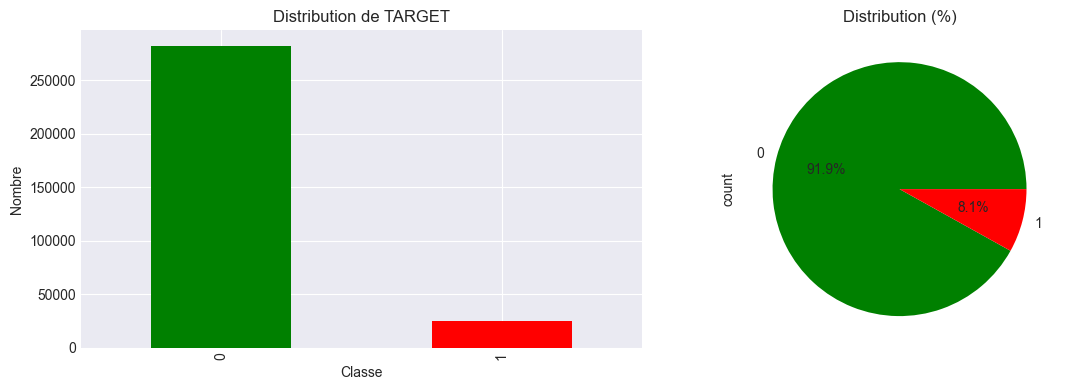


Dessequilibre de classe:
Classe 0 (Bon): 282686
Classe 1 (Mauvais): 24825


In [ ]:
# Distribution de la cible
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train['TARGET'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribution de TARGET')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Nombre')

train['TARGET'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Distribution (%)')

plt.tight_layout()
plt.show()

print(f"\nDessequilibre de classe:")
print(f"Classe 0 (Bon): {(train['TARGET'] == 0).sum()}")
print(f"Classe 1 (Mauvais): {(train['TARGET'] == 1).sum()}")

## 9.2 - Undersampling (Alternative à SMOTE)

In [ ]:
print("\n" + "="*70)
print("RÉSUMÉ: ÉTAPE 1 - PRÉPARATION ET NETTOYAGE DES DONNÉES")
print("="*70)

print("\n✅ TÂCHES COMPLÈTÉES:")
print(f"\n1. EXPLORATION DES DONNÉES")
print(f"   • Chargement de 8 sources de données")
print(f"   • {len(application_train.columns)} colonnes initiales")
print(f"   • {len(application_train):,} lignes en train")
print(f"   • Analyse de la distribution des classes")
print(f"   • Analyse des valeurs manquantes")

print(f"\n2. FUSION DES DONNÉES")
print(f"   • Agrégation de Bureau Balance")
print(f"   • Agrégation de Bureau par client")
print(f"   • Agrégation de Credit Card Balance")
print(f"   • Agrégation des Installments Payments")
print(f"   • Agrégation de POS Cash Balance")
print(f"   • Agrégation de Previous Application")
print(f"   • Dataset final: {train.shape[1]} colonnes")

print(f"\n3. FEATURE ENGINEERING")
print(f"   • Features temporelles (AGE, EMPLOYMENT_DAYS)")
print(f"   • Features de ratios revenus/crédit")
print(f"   • Features de stabilité d'emploi")
print(f"   • Features de documents et contacts")
print(f"   • Variables catégories simplifiées")

print(f"\n4. GESTION DES VALEURS MANQUANTES")
print(f"   • Analyse des valeurs manquantes (pas d'imputation ici)")

print(f"\n5. EXPORT DES DONNÉES")
print(f"   ✓ train_processed.parquet: {train.shape}")
print(f"   ✓ test_processed.parquet: {test.shape}")

print("\n" + "="*70)
print("✅ ÉTAPE 1 COMPLÈTÉE - DONNÉES PRÊTES POUR L'ENTRAÎNEMENT")
print("="*70)

print("\n📊 PROCHAINES ÉTAPES:")
print("   → Étape 2: Entraînement des modèles (notebook 02_model_training.ipynb)")
print("   → Étape 3: Optimisation des hyperparamètres")
print("   → Étape 4: Analyse de l'importance des features et seuil optimal")

print("\n📁 FICHIERS GÉNÉRÉS:")
print(f"   • outputs/train_processed.parquet ({train.shape[0]:,} lignes, {train.shape[1]} colonnes)")
print(f"   • outputs/test_processed.parquet ({test.shape[0]:,} lignes)")
print(f"   • models/feature_importance_permutation.csv (dernière étape)")


RÉSUMÉ: ÉTAPE 1 - PRÉPARATION ET NETTOYAGE DES DONNÉES

✅ TÂCHES COMPLÈTÉES:

1. EXPLORATION DES DONNÉES
   • Chargement de 8 sources de données
   • 132 colonnes initiales
   • 307,511 lignes en train
   • Analyse de la distribution des classes
   • Analyse des valeurs manquantes

2. FUSION DES DONNÉES
   • Agrégation de Bureau Balance
   • Agrégation de Bureau par client
   • Agrégation de Credit Card Balance
   • Agrégation des Installments Payments
   • Agrégation de POS Cash Balance
   • Agrégation de Previous Application
   • Dataset final: 158 colonnes

3. FEATURE ENGINEERING
   • Features temporelles (AGE, EMPLOYMENT_DAYS)
   • Features de ratios revenus/crédit
   • Features de stabilité d'emploi
   • Features de documents et contacts
   • Variables catégories simplifiées

4. GESTION DES VALEURS MANQUANTES
   • Analyse des valeurs manquantes (pas d'imputation ici)

5. EXPORT DES DONNÉES
   ✓ train_processed.parquet: (307511, 158)
   ✓ test_processed.parquet: (48744, 131)

✅ ÉT

## 10 - Résumé: Étape de préparation complète

## 9.1 - Analyse détaillée du déséquilibre des données

## 9. Équilibrage des données avec SMOTE